In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
supplychain_df = pd.read_csv('supply_chain_data.csv')

In [3]:
supplychain_df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
supplychain_df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [5]:
'''
Product type
price
availability
no. prod sold
revenue
customer demo
order quantites
shipping times,carrier,costs
supplier name
location
manufacturing costs
inspection result
defect rates
transportation modes
routes
costs
'''
supplychain_df = supplychain_df[['Product type','Price','Availability','Number of products sold','Revenue generated',
                                'Customer demographics','Order quantities','Shipping times','Shipping carriers',
                                'Shipping costs','Supplier name','Location','Manufacturing costs','Inspection results',
                                'Defect rates','Transportation modes','Routes','Costs']]

In [6]:
supplychain_df.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,14.843523,95,736,7460.900065,Female,37,2,Carrier A,9.716575,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,61.163343,68,83,7766.836426,Non-binary,59,6,Carrier C,1.729569,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,4.805496,26,871,2686.505152,Non-binary,56,8,Carrier A,3.890548,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
supplychain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    object 
 6   Order quantities         100 non-null    int64  
 7   Shipping times           100 non-null    int64  
 8   Shipping carriers        100 non-null    object 
 9   Shipping costs           100 non-null    float64
 10  Supplier name            100 non-null    object 
 11  Location                 100 non-null    object 
 12  Manufacturing costs      100 non-null    float64
 13  Inspection results       100 non-null    object 
 14  Defect rates             10

In [8]:
supplychain_df.duplicated().sum()

0

In [9]:
supplychain_df.describe()

,Price,Availability,Number of products sold,Revenue generated,Order quantities,Shipping times,Shipping costs,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,49.220000,5.750000,5.548149,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,26.784429,2.724283,2.651376,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,1.000000,1.000000,1.013487,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,26.000000,3.750000,3.540248,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,52.000000,6.000000,5.320534,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,71.250000,8.000000,7.601695,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,96.000000,10.000000,9.929816,99.466109,4.939255,997.413450


In [10]:
supplychain_df.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,14.843523,95,736,7460.900065,Female,37,2,Carrier A,9.716575,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,61.163343,68,83,7766.836426,Non-binary,59,6,Carrier C,1.729569,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,4.805496,26,871,2686.505152,Non-binary,56,8,Carrier A,3.890548,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632


In [11]:
#Data Visualization

In [12]:
'''
Which Product is sold more and costs more, what relation is there between the costs and their selling, which prodcut is 
delivered in which area mostly, which gender prefers which type of products,what are their manufacturing costs and how 
much profit they generate
'''

'\nWhich Product is sold more and costs more, what relation is there between the costs and their selling, which prodcut is \ndelivered in which area mostly, which gender prefers which type of products,what are their manufacturing costs and how \nmuch profit they generate\n'

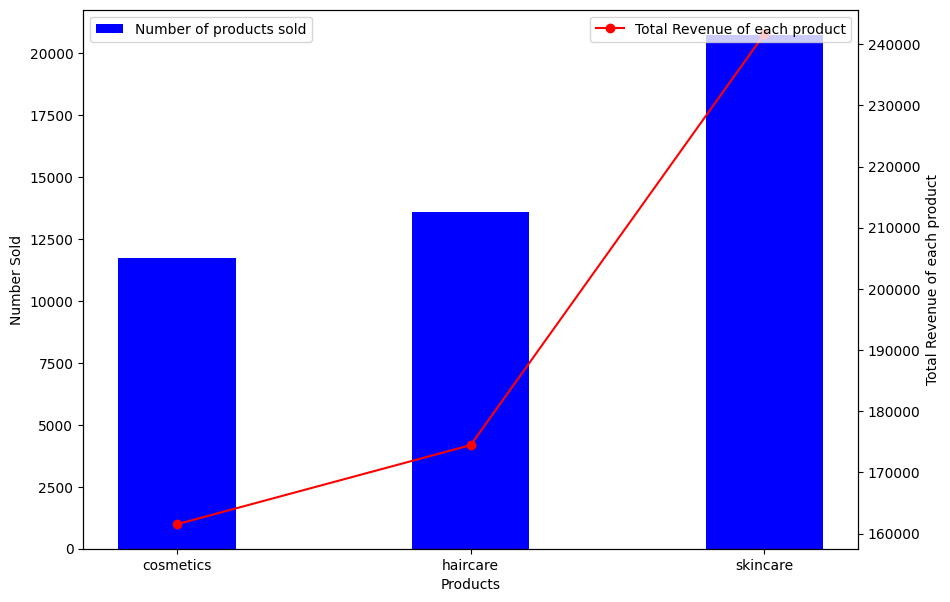

In [13]:
import matplotlib.pyplot as plt


product_values = supplychain_df.groupby('Product type').agg({'Number of products sold': 'sum', 'Revenue generated': 'sum'})

fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)

ax1.bar(product_values.index, product_values['Number of products sold'], color='blue', width=0.4, label="Number of products sold")
ax1.set_ylabel("Number Sold")

ax2 = ax1.twinx()
ax2.plot(product_values.index, product_values['Revenue generated'], color='red', marker='o', label="Total Revenue of each product")
ax2.set_ylabel("Total Revenue of each product")

ax1.set_xlabel("Products")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [14]:
#Gender vs Product----------------> Which gender prefers which products mostly

In [15]:
supplychain_df.columns = [col.strip().replace(' ', '_').replace('/', '_').upper() for col in supplychain_df.columns]

In [16]:
# Group the data by 'CUSTOMER_DEMOGRAPHICS' and 'Product Type' and count the occurrences
grouped_data = supplychain_df.groupby(['CUSTOMER_DEMOGRAPHICS', 'PRODUCT_TYPE']).size().unstack()
grouped_data

PRODUCT_TYPE,cosmetics,haircare,skincare
CUSTOMER_DEMOGRAPHICS,,,
Female,10,2,13
Male,4,10,7
Non-binary,5,7,11
Unknown,7,15,9


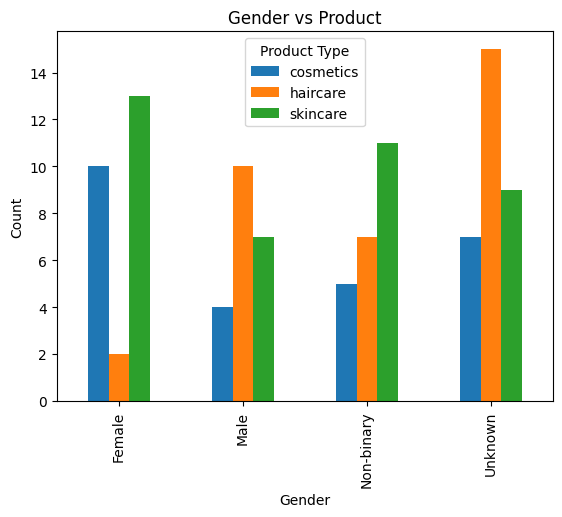

In [17]:
# Plot the grouped data
grouped_data.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Product')
plt.legend(title='Product Type')
plt.show()

In [18]:
supplychain_df.head()

,PRODUCT_TYPE,PRICE,AVAILABILITY,NUMBER_OF_PRODUCTS_SOLD,REVENUE_GENERATED,CUSTOMER_DEMOGRAPHICS,ORDER_QUANTITIES,SHIPPING_TIMES,SHIPPING_CARRIERS,SHIPPING_COSTS,SUPPLIER_NAME,LOCATION,MANUFACTURING_COSTS,INSPECTION_RESULTS,DEFECT_RATES,TRANSPORTATION_MODES,ROUTES,COSTS
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,14.843523,95,736,7460.900065,Female,37,2,Carrier A,9.716575,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,61.163343,68,83,7766.836426,Non-binary,59,6,Carrier C,1.729569,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,4.805496,26,871,2686.505152,Non-binary,56,8,Carrier A,3.890548,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632


In [19]:
location_based = supplychain_df[['PRODUCT_TYPE','LOCATION']]

In [20]:
grouped_data = location_based.groupby(['PRODUCT_TYPE', 'LOCATION']).size().unstack()
grouped_data

LOCATION,Bangalore,Chennai,Delhi,Kolkata,Mumbai
PRODUCT_TYPE,,,,,
cosmetics,3,5,6,4,8
haircare,9,6,4,8,7
skincare,6,9,5,13,7


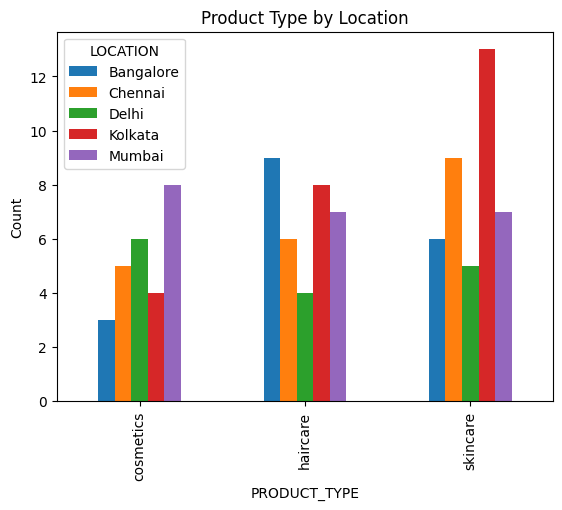

In [21]:
grouped_data.plot(kind='bar')
plt.xlabel('PRODUCT_TYPE')
plt.ylabel('Count')
plt.title('Product Type by Location')
plt.legend(title='LOCATION')
plt.show()

In [22]:
supplychain_df.head()

,PRODUCT_TYPE,PRICE,AVAILABILITY,NUMBER_OF_PRODUCTS_SOLD,REVENUE_GENERATED,CUSTOMER_DEMOGRAPHICS,ORDER_QUANTITIES,SHIPPING_TIMES,SHIPPING_CARRIERS,SHIPPING_COSTS,SUPPLIER_NAME,LOCATION,MANUFACTURING_COSTS,INSPECTION_RESULTS,DEFECT_RATES,TRANSPORTATION_MODES,ROUTES,COSTS
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,14.843523,95,736,7460.900065,Female,37,2,Carrier A,9.716575,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,61.163343,68,83,7766.836426,Non-binary,59,6,Carrier C,1.729569,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,4.805496,26,871,2686.505152,Non-binary,56,8,Carrier A,3.890548,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632


In [23]:
#Lets Plot Product Sold vs Price

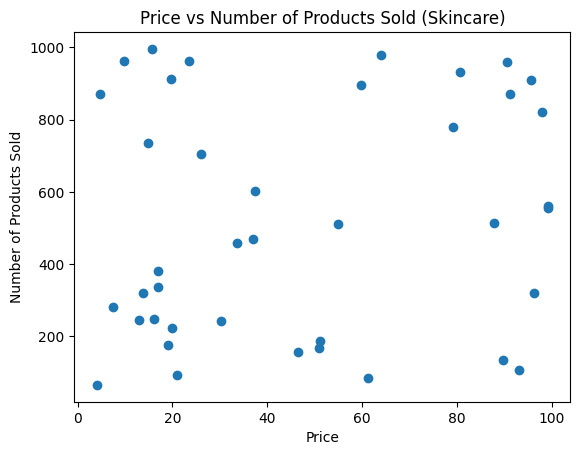

In [24]:
skincare_data = supplychain_df[supplychain_df['PRODUCT_TYPE'] == 'skincare']
x = skincare_data['PRICE']
y = skincare_data['NUMBER_OF_PRODUCTS_SOLD']

plt.scatter(x, y)
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.title('Price vs Number of Products Sold (Skincare)')
plt.show()

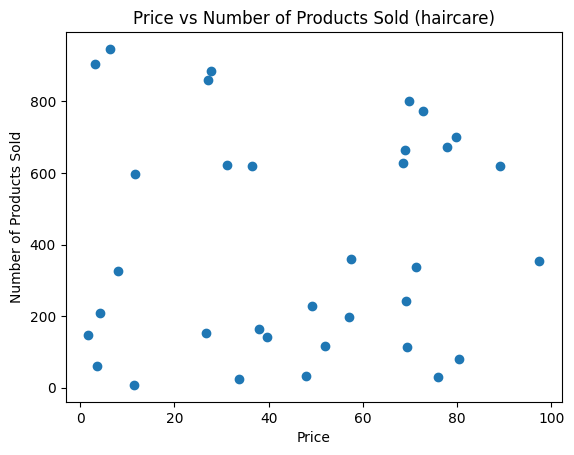

In [25]:
haircare_data = supplychain_df[supplychain_df['PRODUCT_TYPE'] == 'haircare']
x = haircare_data['PRICE']
y = haircare_data['NUMBER_OF_PRODUCTS_SOLD']

plt.scatter(x, y)
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.title('Price vs Number of Products Sold (haircare)')
plt.show()

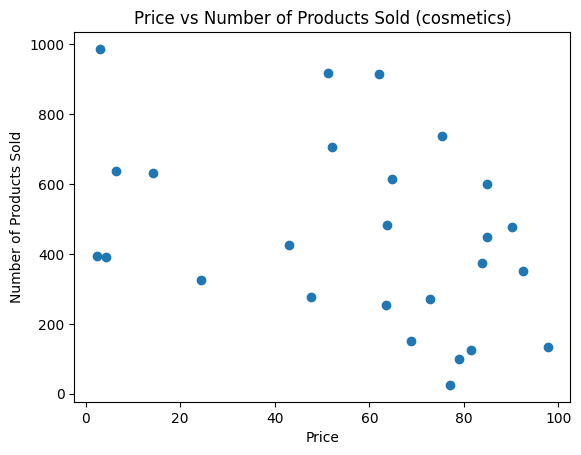

In [26]:
cosmetics_data = supplychain_df[supplychain_df['PRODUCT_TYPE'] == 'cosmetics']
x = cosmetics_data['PRICE']
y = cosmetics_data['NUMBER_OF_PRODUCTS_SOLD']

plt.scatter(x, y)
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.title('Price vs Number of Products Sold (cosmetics)')
plt.show()

In [27]:
supplychain_df['PROFIT'] = (supplychain_df['REVENUE_GENERATED']-(supplychain_df['MANUFACTURING_COSTS']+supplychain_df['SHIPPING_COSTS']))

In [28]:
supplychain_df.head()

,PRODUCT_TYPE,PRICE,AVAILABILITY,NUMBER_OF_PRODUCTS_SOLD,REVENUE_GENERATED,CUSTOMER_DEMOGRAPHICS,ORDER_QUANTITIES,SHIPPING_TIMES,SHIPPING_CARRIERS,SHIPPING_COSTS,SUPPLIER_NAME,LOCATION,MANUFACTURING_COSTS,INSPECTION_RESULTS,DEFECT_RATES,TRANSPORTATION_MODES,ROUTES,COSTS,PROFIT
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075,8612.760341
1,skincare,14.843523,95,736,7460.900065,Female,37,2,Carrier A,9.716575,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579,7417.566722
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282,9539.007127
3,skincare,61.163343,68,83,7766.836426,Non-binary,59,6,Carrier C,1.729569,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159,7729.482116
4,skincare,4.805496,26,871,2686.505152,Non-binary,56,8,Carrier A,3.890548,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632,2590.549443


In [29]:
'''
Revenue based on demographics and which product gives the highest revenue
'''

'\nRevenue based on demographics and which product gives the highest revenue\n'

In [30]:
revenue_by_gender = supplychain_df.groupby(['LOCATION'])['REVENUE_GENERATED'].sum()
print(revenue_by_gender)

LOCATION
Bangalore    102601.723882
Chennai      119142.815748
Delhi         81027.701225
Kolkata      137077.551005
Mumbai       137755.026877
Name: REVENUE_GENERATED, dtype: float64


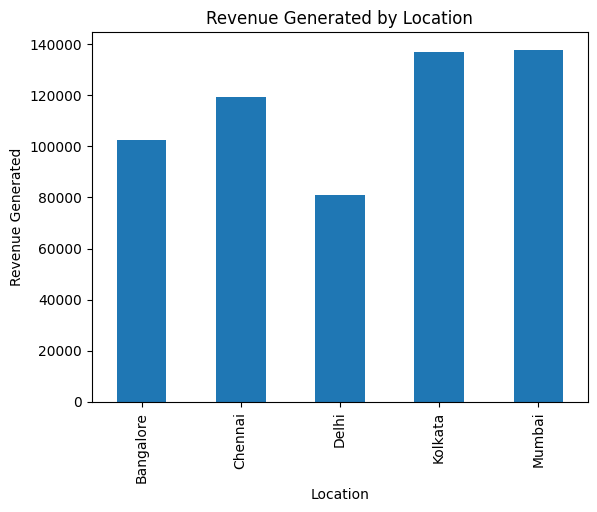

In [31]:
revenue_by_gender.plot(kind='bar')

plt.xlabel('Location')
plt.ylabel('Revenue Generated')
plt.title('Revenue Generated by Location')
plt.show()

In [32]:
#Lets begin with supply chain management now

In [33]:
supplychain_df.head()

,PRODUCT_TYPE,PRICE,AVAILABILITY,NUMBER_OF_PRODUCTS_SOLD,REVENUE_GENERATED,CUSTOMER_DEMOGRAPHICS,ORDER_QUANTITIES,SHIPPING_TIMES,SHIPPING_CARRIERS,SHIPPING_COSTS,SUPPLIER_NAME,LOCATION,MANUFACTURING_COSTS,INSPECTION_RESULTS,DEFECT_RATES,TRANSPORTATION_MODES,ROUTES,COSTS,PROFIT
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075,8612.760341
1,skincare,14.843523,95,736,7460.900065,Female,37,2,Carrier A,9.716575,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579,7417.566722
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282,9539.007127
3,skincare,61.163343,68,83,7766.836426,Non-binary,59,6,Carrier C,1.729569,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159,7729.482116
4,skincare,4.805496,26,871,2686.505152,Non-binary,56,8,Carrier A,3.890548,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632,2590.549443


Lets Begin with supplier analysis

In [34]:
supplychain_df[['SHIPPING_CARRIERS','ORDER_QUANTITIES']].head()

,SHIPPING_CARRIERS,ORDER_QUANTITIES
0,Carrier B,96
1,Carrier A,37
2,Carrier B,88
3,Carrier C,59
4,Carrier A,56


In [35]:
carrier_grouped = supplychain_df.groupby('SHIPPING_CARRIERS')['ORDER_QUANTITIES'].sum()

In [36]:
carrier_grouped

SHIPPING_CARRIERS
Carrier A    1339
Carrier B    2002
Carrier C    1581
Name: ORDER_QUANTITIES, dtype: int64

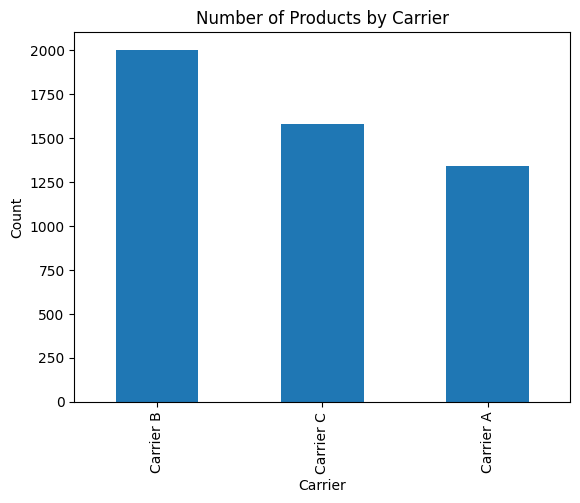

In [37]:
carrier_grouped_sorted = carrier_grouped.sort_values(ascending=False)
carrier_grouped_sorted.plot(kind='bar')

plt.xlabel('Carrier')
plt.ylabel('Count')
plt.title('Number of Products by Carrier')

plt.show()

In [38]:
carrier_cost_grouped = supplychain_df.groupby('SHIPPING_CARRIERS')['SHIPPING_COSTS'].sum()

In [39]:
carrier_cost_grouped

SHIPPING_CARRIERS
Carrier A    155.537831
Carrier B    236.897620
Carrier C    162.379457
Name: SHIPPING_COSTS, dtype: float64

<AxesSubplot: xlabel='SHIPPING_CARRIERS'>

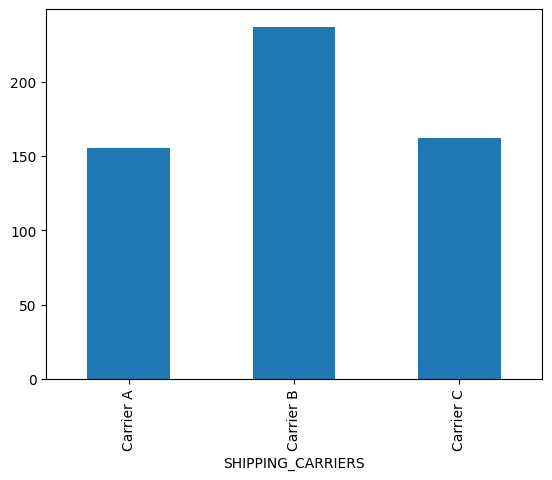

In [40]:
carrier_cost_grouped.plot(kind='bar')

In [41]:
supplychain_df[['ROUTES','SHIPPING_COSTS']].head()

,ROUTES,SHIPPING_COSTS
0,Route B,2.956572
1,Route B,9.716575
2,Route C,8.054479
3,Route A,1.729569
4,Route A,3.890548


In [42]:
supplychain_df['ROUTES'].unique()

array(['Route B', 'Route C', 'Route A'], dtype=object)

In [43]:
routes_grouped = supplychain_df.groupby('ROUTES')['SHIPPING_COSTS'].sum()

In [44]:
routes_grouped

ROUTES
Route A    231.327064
Route B    205.423475
Route C    118.064369
Name: SHIPPING_COSTS, dtype: float64

<AxesSubplot: xlabel='ROUTES'>

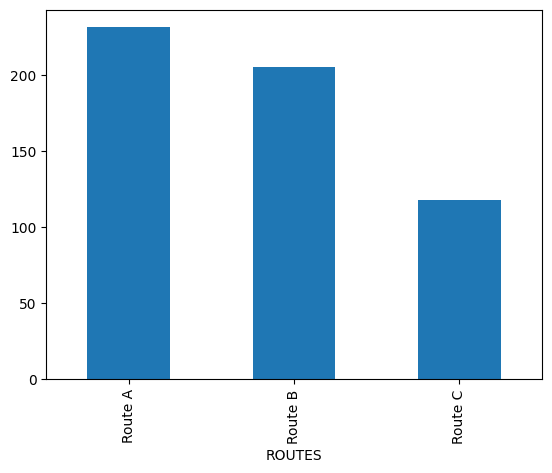

In [45]:
routes_grouped.plot(kind='bar')

<b>Observation</b>:

Route A costs more, followed by Route B and then Route C

Carrier B costs more followed by carrier c and then carrier A

Carrier B carries the most of the products, followed by carrier C and then Carrier A


<b>Conclusion</b>

Route C , Carrier C looks like a better option, however there are some trade offs between them like

Route C costs the Least

Carrier C cost is less than B but more than A(negligible difference)

Carrier C carries less products compared to B and more compared to A

In [46]:
supplychain_df[['TRANSPORTATION_MODES','PROFIT']].head()

,TRANSPORTATION_MODES,PROFIT
0,Road,8612.760341
1,Road,7417.566722
2,Air,9539.007127
3,Rail,7729.482116
4,Air,2590.549443


In [47]:
supplychain_df['TRANSPORTATION_MODES'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

In [48]:
#lets see which transportation mode gives the most profit

In [49]:
transportation_grouped = supplychain_df.groupby('TRANSPORTATION_MODES')['PROFIT'].sum()

In [50]:
transportation_grouped

TRANSPORTATION_MODES
Air     154477.444045
Rail    163450.216460
Road    157598.623701
Sea      96797.050300
Name: PROFIT, dtype: float64

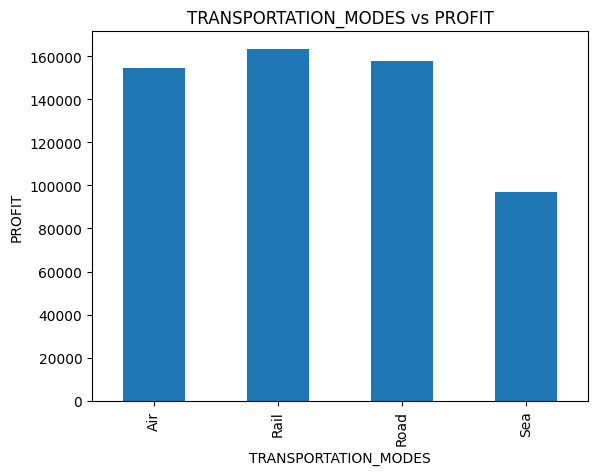

In [51]:
transportation_grouped.plot(kind='bar')
plt.xlabel('TRANSPORTATION_MODES')
plt.ylabel('PROFIT')
plt.title('TRANSPORTATION_MODES vs PROFIT')
plt.show()

Observation:

Air,Rail,Road has negligible difference, howeve rail gives most of the profit

Sea route should be avoided as it gives the least profit

### Let's move on to more detailed analysis

Questions of which answers to look for:

1. Which Carrier carries most of the quantity, delivers in less time and costs less and generates most of the profits.

2. What is the route of the carriers most of th time when they generate high profits.

3. Any 2 best routes for each of the products.

In [52]:
supplychain_df.head()

,PRODUCT_TYPE,PRICE,AVAILABILITY,NUMBER_OF_PRODUCTS_SOLD,REVENUE_GENERATED,CUSTOMER_DEMOGRAPHICS,ORDER_QUANTITIES,SHIPPING_TIMES,SHIPPING_CARRIERS,SHIPPING_COSTS,SUPPLIER_NAME,LOCATION,MANUFACTURING_COSTS,INSPECTION_RESULTS,DEFECT_RATES,TRANSPORTATION_MODES,ROUTES,COSTS,PROFIT
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075,8612.760341
1,skincare,14.843523,95,736,7460.900065,Female,37,2,Carrier A,9.716575,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579,7417.566722
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282,9539.007127
3,skincare,61.163343,68,83,7766.836426,Non-binary,59,6,Carrier C,1.729569,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159,7729.482116
4,skincare,4.805496,26,871,2686.505152,Non-binary,56,8,Carrier A,3.890548,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632,2590.549443


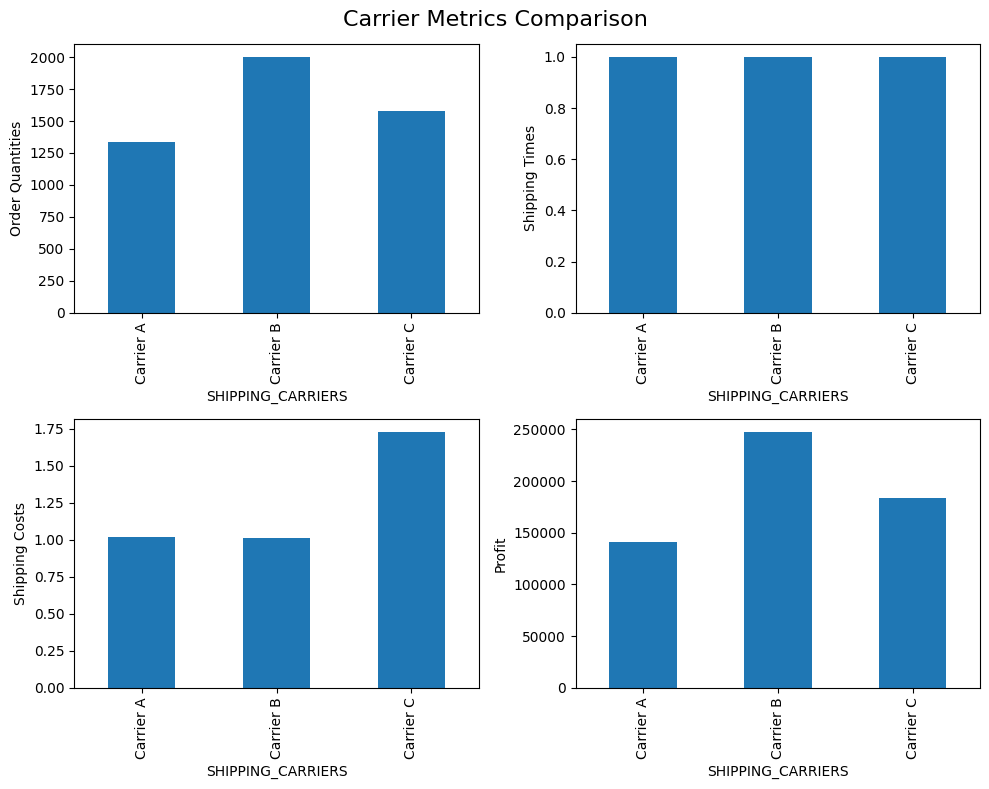

In [53]:
import matplotlib.pyplot as plt

# Group the data by carrier and calculate relevant metrics
carrier_metrics = supplychain_df.groupby('SHIPPING_CARRIERS').agg({
    'ORDER_QUANTITIES': 'sum',
    'SHIPPING_TIMES': 'min',
    'SHIPPING_COSTS': 'min',
    'PROFIT': 'sum'
})

# Plotting the metrics for each carrier
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

carrier_metrics['ORDER_QUANTITIES'].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_ylabel('Order Quantities')

carrier_metrics['SHIPPING_TIMES'].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_ylabel('Shipping Times')

carrier_metrics['SHIPPING_COSTS'].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_ylabel('Shipping Costs')

carrier_metrics['PROFIT'].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_ylabel('Profit')

plt.suptitle('Carrier Metrics Comparison', fontsize=16)
plt.tight_layout()
plt.show()


In [54]:
# The best carrier is carrier B

In [55]:
'''
Carrier B goes through which route most of the times
'''
route_df = supplychain_df[supplychain_df['SHIPPING_CARRIERS']=='Carrier B']

In [56]:
route_df.head()

,PRODUCT_TYPE,PRICE,AVAILABILITY,NUMBER_OF_PRODUCTS_SOLD,REVENUE_GENERATED,CUSTOMER_DEMOGRAPHICS,ORDER_QUANTITIES,SHIPPING_TIMES,SHIPPING_CARRIERS,SHIPPING_COSTS,SUPPLIER_NAME,LOCATION,MANUFACTURING_COSTS,INSPECTION_RESULTS,DEFECT_RATES,TRANSPORTATION_MODES,ROUTES,COSTS,PROFIT
0,haircare,69.808006,55,802,8661.996792,Non-binary,96,4,Carrier B,2.956572,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075,8612.760341
2,haircare,11.319683,34,8,9577.749626,Unknown,88,2,Carrier B,8.054479,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282,9539.007127
5,haircare,1.699976,87,147,2828.348746,Non-binary,66,3,Carrier B,4.444099,Supplier 4,Bangalore,56.766476,Fail,2.779194,Road,Route A,235.461237,2767.138172
7,cosmetics,42.958384,59,426,8496.103813,Female,11,1,Carrier B,2.348339,Supplier 4,Bangalore,99.466109,Fail,0.398177,Road,Route C,802.056312,8394.289366
14,skincare,99.171329,26,562,8653.570926,Non-binary,78,5,Carrier B,2.039770,Supplier 1,Kolkata,5.791437,Pending,0.100683,Air,Route B,929.235290,8645.739720


In [57]:
route_df['ROUTES'].value_counts()

Route A    17
Route B    16
Route C    10
Name: ROUTES, dtype: int64

In [58]:
supplychain_df[['SHIPPING_COSTS','SHIPPING_TIMES','SHIPPING_CARRIERS']].head()

,SHIPPING_COSTS,SHIPPING_TIMES,SHIPPING_CARRIERS
0,2.956572,4,Carrier B
1,9.716575,2,Carrier A
2,8.054479,2,Carrier B
3,1.729569,6,Carrier C
4,3.890548,8,Carrier A


In [59]:
supplychain_df['SHIPPING_COSTS'].nlargest(3)

89    9.929816
28    9.898141
24    9.741292
Name: SHIPPING_COSTS, dtype: float64

In [60]:
supplychain_df['SHIPPING_TIMES'].nlargest(3)

22    10
50    10
75    10
Name: SHIPPING_TIMES, dtype: int64

So we have the best Carrier i.e Carrier B and we also have a look at the best route, CB goes through Route A and B most of the time, lets see which route gives the most profit and takes less time

In [61]:
temp_df = supplychain_df[
    (supplychain_df['SHIPPING_CARRIERS'] == 'Carrier B') &
    ((supplychain_df['ROUTES'] == 'Route A') | (supplychain_df['ROUTES'] == 'Route B') | (supplychain_df['ROUTES'] == 'Route C'))
]

In [62]:
temp_df = temp_df[['SHIPPING_CARRIERS','SHIPPING_TIMES','PROFIT',"ROUTES"]]

In [63]:
temp_df.head()

,SHIPPING_CARRIERS,SHIPPING_TIMES,PROFIT,ROUTES
0,Carrier B,4,8612.760341,Route B
2,Carrier B,2,9539.007127,Route C
5,Carrier B,3,2767.138172,Route A
7,Carrier B,1,8394.289366,Route C
14,Carrier B,5,8645.739720,Route B


Group by routes now

In [64]:
second_temp = temp_df.drop('SHIPPING_CARRIERS',axis=1)
routes_grouped = second_temp.groupby('ROUTES').sum()

In [65]:
routes_grouped

,SHIPPING_TIMES,PROFIT
ROUTES,,
Route A,98,77127.610941
Route B,96,100276.440434
Route C,34,70228.613049


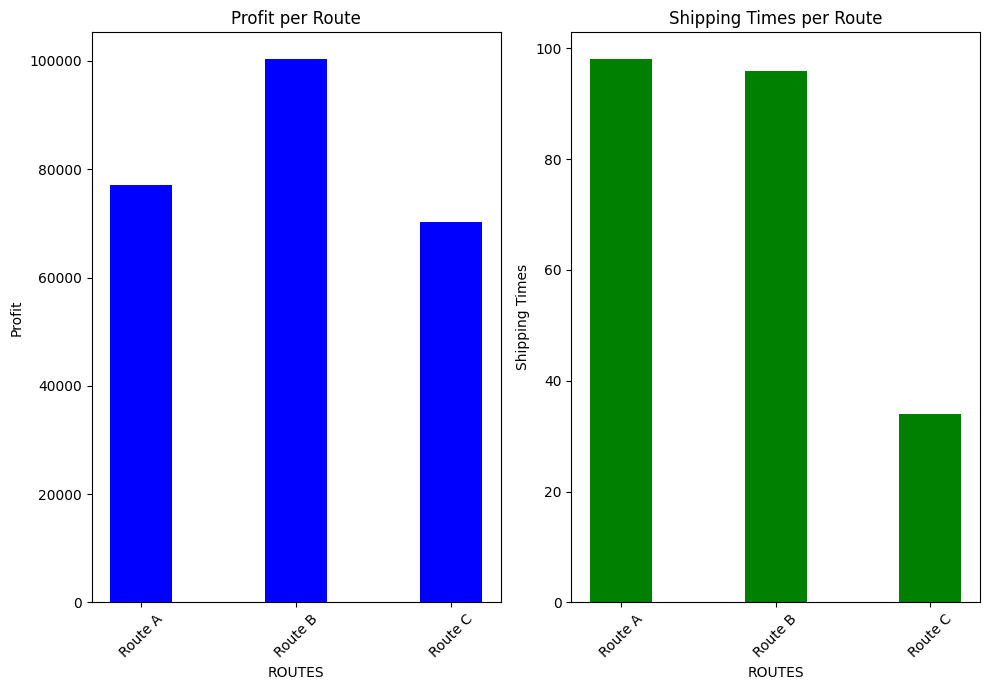

In [66]:
import matplotlib.pyplot as plt

second_temp = temp_df.drop('SHIPPING_CARRIERS', axis=1)
routes_grouped = second_temp.groupby('ROUTES').sum()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

bar_width = 0.4

ax[0].bar(routes_grouped.index, routes_grouped['PROFIT'], width=bar_width, label='PROFIT', color='blue')

ax[1].bar(routes_grouped.index, routes_grouped['SHIPPING_TIMES'], width=bar_width, label='SHIPPING_TIMES', color='green')

ax[0].set_xlabel('ROUTES')
ax[0].set_ylabel('Profit')
ax[0].set_title('Profit per Route')

ax[1].set_xlabel('ROUTES')
ax[1].set_ylabel('Shipping Times')
ax[1].set_title('Shipping Times per Route')
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Route B and Route C can be taken into consideration
Carrier B and Route C